Miłosz Błachowiak

**Lab 6 - Model comparison**

In [1]:
from cmdstanpy import CmdStanModel
from cmdstanpy import install_cmdstan

install_cmdstan()

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Installing CmdStan version: 2.32.1
Install directory: /root/.cmdstan
Download successful, file: /tmp/tmpltcp3lmu
Extracting distribution
Unpacked download as cmdstan-2.32.1
Building version cmdstan-2.32.1, may take several minutes, depending on your system.
Test model compilation
Installed cmdstan-2.32.1


**Excercise 1 - generate data**

In [172]:
F = len("Miłosz")
L = len("Błachowiak")
N = (L + F) * 100
data = {'N': N}

In [173]:
model_1=CmdStanModel(stan_file='code_1.stan')

sim_1=model_1.sample(data=data,
                     iter_sampling=1,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     refresh=1,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/Data_Analytics_LAB/Lab6/code_1.stan to exe file /home/Data_Analytics_LAB/Lab6/code_1
INFO:cmdstanpy:compiled model executable: /home/Data_Analytics_LAB/Lab6/code_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [174]:
df_1 = sim_1.draws_pd()
df_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1591],y[1592],y[1593],y[1594],y[1595],y[1596],y[1597],y[1598],y[1599],y[1600]
0,0.0,0.0,0.01,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,...,-0.93163,-1.4911,1.40816,-0.554631,0.674701,-1.0954,1.51691,0.248965,0.703327,-0.16399


In [175]:
model_2=CmdStanModel(stan_file='code_2.stan')

sim_2=model_2.sample(data=data,
                     iter_sampling=1,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     refresh=1,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/Data_Analytics_LAB/Lab6/code_2.stan to exe file /home/Data_Analytics_LAB/Lab6/code_2
INFO:cmdstanpy:compiled model executable: /home/Data_Analytics_LAB/Lab6/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [176]:
df_2 = sim_2.draws_pd()
df_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1591],y[1592],y[1593],y[1594],y[1595],y[1596],y[1597],y[1598],y[1599],y[1600]
0,0.0,0.0,2.70817,0.777181,-1.27227,0.127591,-1.38942,0.246162,1.19873,2.26533,...,3.47478,2.14349,-4.15155,2.59483,3.23089,-2.12076,-0.436891,4.36468,0.509752,3.57432


**Excercise 2 - compare normal and student models for data from first file**

In [177]:
y = df_1.loc[0, 'y[1]':f'y[{N}]'].values
data={'N': N, 'y': y}

In [178]:
model_3=CmdStanModel(stan_file='code_3.stan')

R=1000
sim_3=model_3.sample(data=data,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     refresh=R,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/Data_Analytics_LAB/Lab6/code_3.stan to exe file /home/Data_Analytics_LAB/Lab6/code_3
INFO:cmdstanpy:compiled model executable: /home/Data_Analytics_LAB/Lab6/code_3
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [179]:
df_3 = sim_3.draws_pd()
df_3.head()

,lp__,accept_stat__,sigma,mu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],log_lik[6],...,y_hat[1591],y_hat[1592],y_hat[1593],y_hat[1594],y_hat[1595],y_hat[1596],y_hat[1597],y_hat[1598],y_hat[1599],y_hat[1600]
0,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,1.409740,1.498230,-0.95347,0.798262,1.613460,0.678667,0.600272,1.85261,0.751808,1.672880
1,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,2.026720,1.203730,0.71367,1.499340,0.148251,-0.322323,1.055210,1.16563,1.147530,1.598210
2,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,-0.095651,0.443792,1.55362,1.842010,1.316500,0.545841,0.325950,1.89632,2.024020,-0.093618
3,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,2.084850,1.374830,1.07671,2.148330,2.650800,1.009420,1.272630,1.79037,0.800646,2.067290
4,0.0,0.0,0.815985,0.899524,-2.03201,-1.41225,-2.97193,-1.03486,-1.91112,-0.733863,...,0.115059,0.004788,1.53491,0.590320,1.323000,0.612259,-0.778860,2.25040,1.668070,2.055830


In [180]:
model_4=CmdStanModel(stan_file='code_4.stan')

R=1000
sim_4=model_4.sample(data=data,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     refresh=R,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/Data_Analytics_LAB/Lab6/code_4.stan to exe file /home/Data_Analytics_LAB/Lab6/code_4
INFO:cmdstanpy:compiled model executable: /home/Data_Analytics_LAB/Lab6/code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [181]:
df_4 = sim_4.draws_pd()
df_4.head()

,lp__,accept_stat__,sigma,mu,nu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],...,y_hat[1591],y_hat[1592],y_hat[1593],y_hat[1594],y_hat[1595],y_hat[1596],y_hat[1597],y_hat[1598],y_hat[1599],y_hat[1600]
0,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,1.695300,0.920238,-0.528407,-0.101363,-1.316580,0.592289,-0.315271,0.469908,0.813988,0.658419
1,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,1.234070,1.036400,-1.731160,-0.450571,0.773908,1.065790,1.969870,1.793470,0.785400,0.342949
2,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,1.678770,2.903830,0.582563,0.949237,-0.213948,2.485440,1.940370,0.670950,0.514564,0.523983
3,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,0.988757,0.353362,-0.139613,1.945350,2.456720,1.081760,-0.641556,0.498414,0.200934,1.115200
4,0.0,0.0,0.815985,0.899524,5.44859,-2.03228,-1.49543,-2.7066,-1.11854,-1.93434,...,0.302476,1.394600,-0.926261,2.226060,2.365880,1.295440,1.533730,0.054086,-0.600568,1.354480


**Model description**

In [182]:
# Normal model
fit_model_1 = az.from_cmdstanpy(posterior=sim_3)
fit_model_1

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [183]:
# Student model
fit_model_2 = az.from_cmdstanpy(posterior=sim_4)
fit_model_2

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

WAIC model comparison

Text(0.5, 1.0, 'WAIC model comparison')

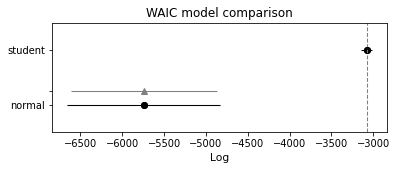

In [184]:
waic = az.compare({'normal': fit_model_1, 'student': fit_model_2}, ic="waic")
az.plot_compare(waic)
plt.title("WAIC model comparison")

LOO model comparison

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Text(0.5, 1.0, 'LOO model comparison')

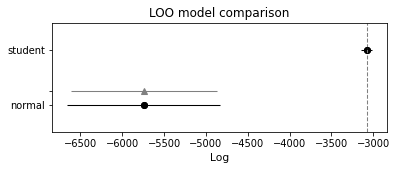

In [185]:
loo = az.compare({'normal': fit_model_1, 'student': fit_model_2}, ic="loo")
az.plot_compare(loo)
plt.title("LOO model comparison")

**Excercise 3 - compare models with different numbers of predictors**

In [186]:
y = df_2.loc[0, 'y[1]':f'y[{N}]'].values

In [187]:
model_5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/Data_Analytics_LAB/Lab6/code_5.stan to exe file /home/Data_Analytics_LAB/Lab6/code_5
INFO:cmdstanpy:compiled model executable: /home/Data_Analytics_LAB/Lab6/code_5


In [188]:
models = []
for K in range(3):
    X = df_2.loc[:, 'X[1,1]':f'X[{N},{K+1}]'].values.reshape((N, K+1))
    data={'N': N, 'K': K+1, 'y': y, 'X': X}
    R=1000
    sim=model_5.sample(data=data,
                        iter_sampling=R,
                        iter_warmup=0,
                        chains=1,
                        fixed_param=True,
                        refresh=R,
                        seed=29042020)
    models.append(sim)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [189]:
model_1_pred = az.from_cmdstanpy(posterior=models[0])
model_2_pred = az.from_cmdstanpy(posterior=models[1])
model_3_pred = az.from_cmdstanpy(posterior=models[2])

In [190]:
print("Model with 1 predictor")
model_1_pred

Model with 1 predictor


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [191]:
print("Model with 2 predictors")
model_2_pred

Model with 2 predictors


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [195]:
print("Model with 3 predictors")
model_3_pred

Model with 3 predictors


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

WAIC model comparison

Text(0.5, 1.0, 'WAIC model comparison')

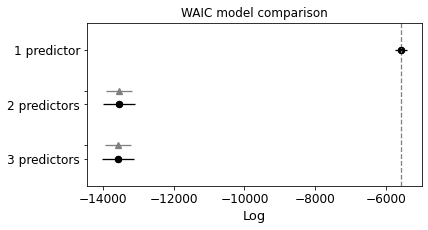

In [193]:
waic = az.compare({'1 predictor': model_1_pred, '2 predictors': model_2_pred, '3 predictors': model_3_pred}, ic="waic")
az.plot_compare(waic)
plt.title("WAIC model comparison")

LOO model comparison

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

Text(0.5, 1.0, 'LOO model comparison')

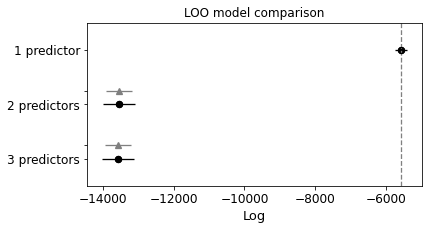

In [194]:
loo = az.compare({'1 predictor': model_1_pred, '2 predictors': model_2_pred, '3 predictors': model_3_pred}, ic="loo")
az.plot_compare(loo)
plt.title("LOO model comparison")

Model with 1 predictor returns the best results.